# Preprocessing

## Importo le librerie utili

In [1]:
#La keyword import mi permette di utilizzare le funzioni presenti in altre librerie all'interno del mio script
#NB: Le librerie prima vanno scaricate

import numpy as np
import os
import pandas as pd
import mne

from mne.preprocessing import ICA

#Per utilizzare una funzione da queste librerie devo scrivere: nome_libreria.nome_funzione()

***

## Importo l'EEG del paziente che voglio studiare

Creo una stringa di testo contenente l'indirizzo della cartella dove sono gli eeg

In [2]:
#Se avete messo il dataset nella stessa cartella del notebook potete usare questa riga, crea la stringa contenente il percorso
#della working directory
#home_path = os.path.abspath(os.getcwd())

#altrimenti usate questa
home_path = "E:\\Datasets\\NL3"

#la vostra sarà diversa, dovrete cambiarla (Tasto dx del mouse sulla cartella + 'copia come percorso')
#Python legge '\' dei percorsi come un carattere speciale quindi quando li scrivete dovete sostituirlo con '\\'

print(home_path)

E:\Datasets\NL3


Scelgo l'indice del paziente che voglio studiare

In [3]:
paziente = 11

Creo la stringa contenente l'indirizo del file dell'EEG del paziente che ho scelto
NB: str() converte un numero in una stringa e per concatenare più stringhe in python si può usare il +

In [4]:
if paziente<10:
        filename = home_path+"\eeg\sub-0"+str(paziente)+"\eeg\sub-0"+str(paziente)+"_task-rsvp_eeg.vhdr"
if paziente >= 10:
        filename = home_path+"\eeg\sub-"+str(paziente)+"\eeg\sub-"+str(paziente)+"_task-rsvp_eeg.vhdr"
        
print(filename)

E:\Datasets\NL3\eeg\sub-11\eeg\sub-11_task-rsvp_eeg.vhdr


Utilizzo la funzione di mne "read_raw_brainvision" per importare l'eeg del paziente

In [5]:
raw=mne.io.read_raw_brainvision(filename, preload=True)

Extracting parameters from E:\Datasets\NL3\eeg\sub-11\eeg\sub-11_task-rsvp_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 3226059  =      0.000 ...  3226.059 secs...


Eseguo il plot dell'EEG

Using matplotlib as 2D backend.


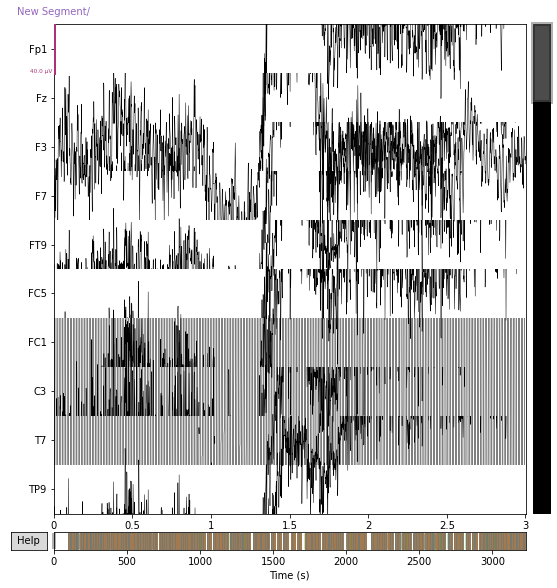

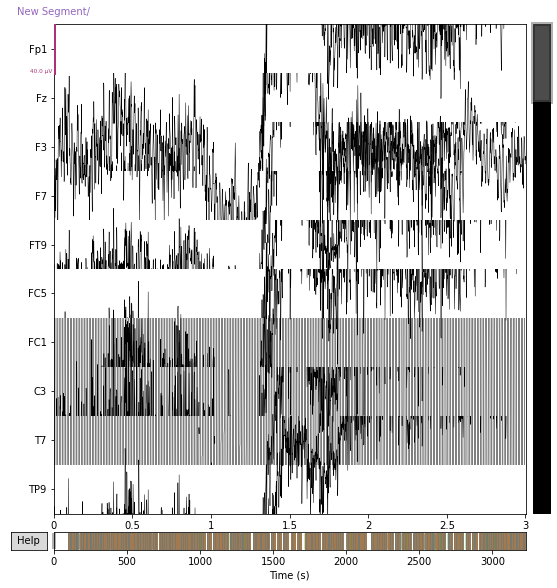

In [6]:
#Plot di 3 secondi di 10 canali dell'EEG
raw.plot(duration = 3, n_channels = 10)

Eseguo il plot della Power Spectral Density

Effective window size : 0.256 (s)


C:\Users\Asus\anaconda3\envs\nl2\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


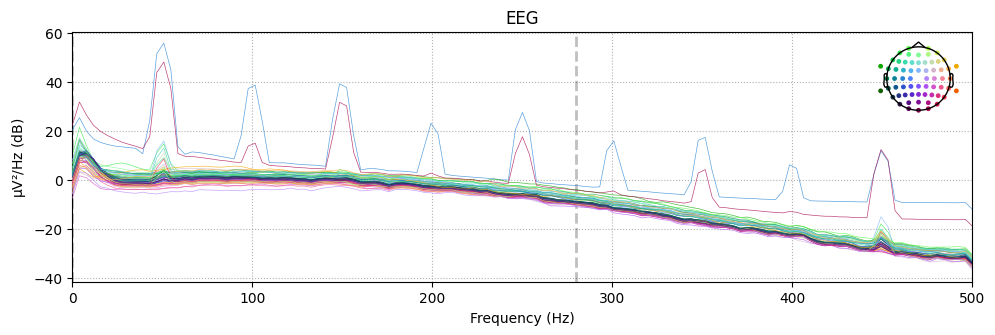

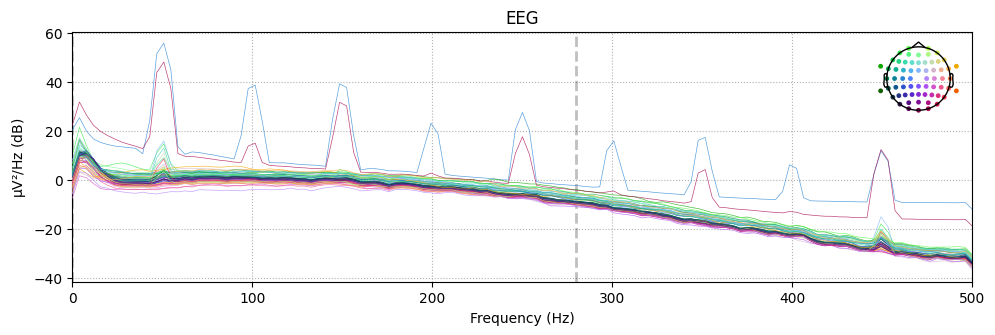

In [7]:
#Plot della Power Spectral Density dei canali
raw.compute_psd().plot()

#### Provate a vedere pazienti e canali diversi!

***

## Filtri e Resampling

Applico un filtro FIR tra 0.1 e 12 Hz per isolare le frequenze rilevanti
<br>
Potete anche provare ad utilizzare un filtro iir Butterworth con method = 'iir'

In [8]:
filtro=raw.filter(0.1, 12, method='fir')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 33001 samples (33.001 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:   20.9s finished


Effective window size : 0.256 (s)


C:\Users\Asus\anaconda3\envs\nl2\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


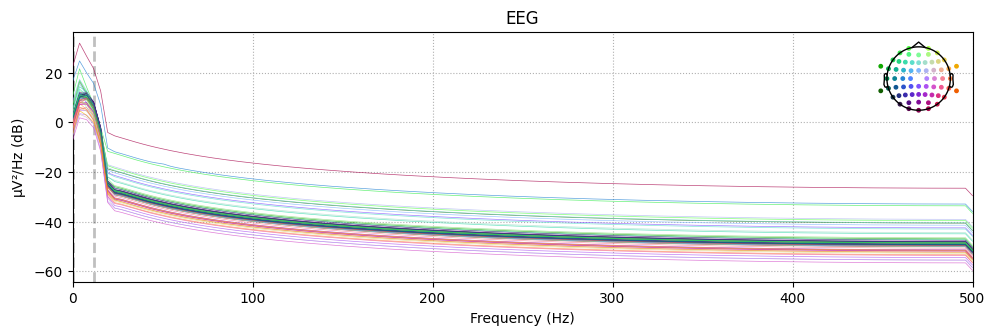

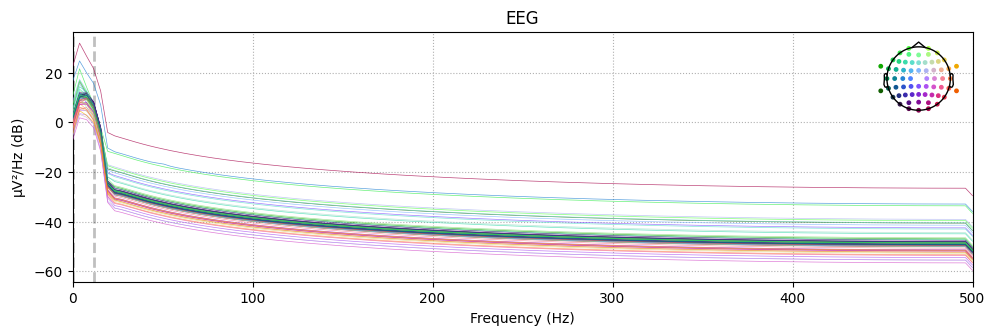

In [9]:
filtro.compute_psd().plot()

In [10]:
reference=filtro.set_eeg_reference(ref_channels='average')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


Il dataset ha un sample ratio di 1000 Hz, che è troppo alto, quindi faccio un resampling e lo porto a 250 Hz, in questo modo velocizzo l'analisi 

Effective window size : 1.024 (s)


C:\Users\Asus\anaconda3\envs\nl2\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


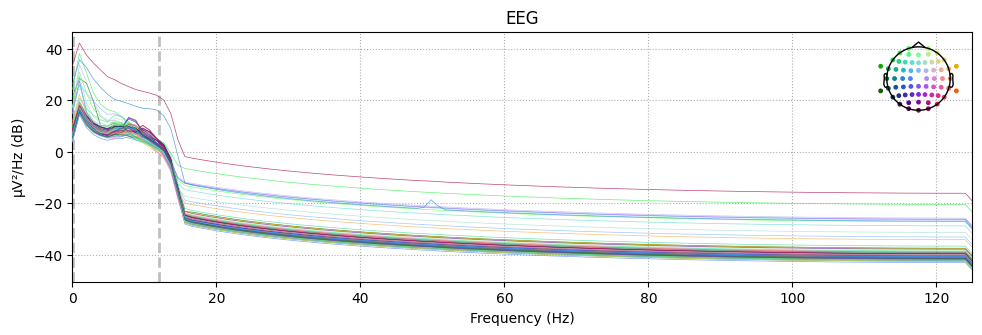

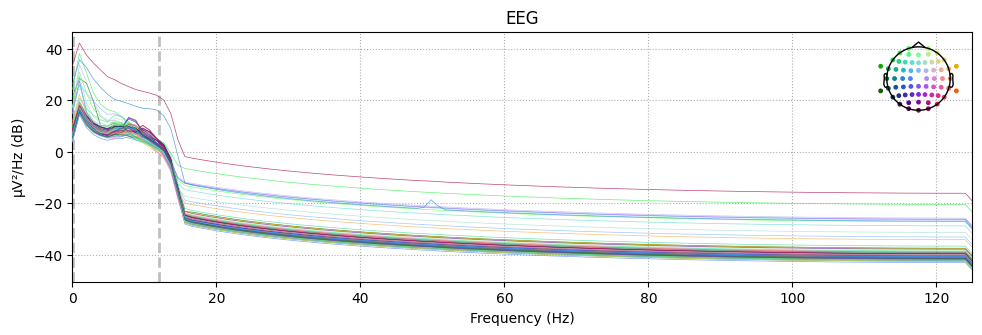

In [11]:
resample=reference.resample(sfreq=250)
resample.compute_psd().plot()

Setting up band-stop filter from 9.5 - 11 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 9.47
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 9.22 Hz)
- Upper passband edge: 10.53 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 10.78 Hz)
- Filter length: 1651 samples (6.604 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.0s finished


Effective window size : 1.024 (s)


C:\Users\Asus\anaconda3\envs\nl2\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


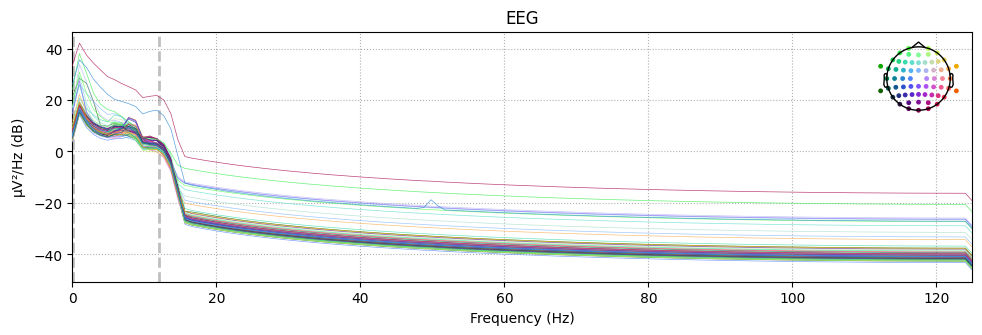

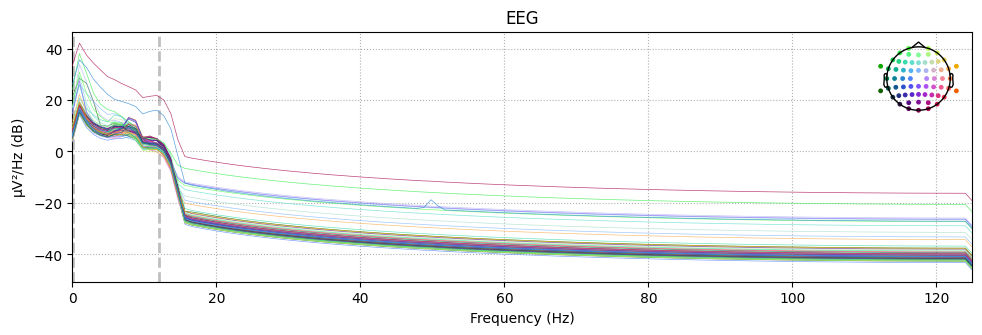

In [12]:
notch=resample.notch_filter(freqs=10)
notch.compute_psd().plot()

## ICA - Independent Component Analysis

Per utilizzare l'ICA è consigliato applicare un filtro passa-alto di 1 Hz

In [13]:
preica=notch.filter(l_freq=1., h_freq=None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.2s finished


Imposto la bipolar reference

Uso i canali prefrontali per costruire un nuovo canale artificiale che sostituirà l'EOG nella ricerca di artefatti oculari

In [14]:
bipolar_ref=mne.set_bipolar_reference(preica, 'Fp1', 'Fp2', ch_name='Reference', drop_refs=False)
reconst_raw=bipolar_ref.copy()

EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=806515
    Range : 0 ... 806514 =      0.000 ...  3226.056 secs
Ready.
Added the following bipolar channels:
Reference


In [15]:
ica = ICA(n_components=15, max_iter='auto', random_state=97)
ica.fit(bipolar_ref)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 32.7s.


Method,fastica
Fit,47 iterations on raw data (806515 samples)
ICA components,15
Available PCA components,64
Channel types,eeg
ICA components marked for exclusion,—


Attraverso il nuovo canale calcolo quali componenti rappresentano artefatti oculari e le rimuovo

In [16]:
eog_indices, eog_scores = ica.find_bads_eog(bipolar_ref, ch_name='Reference')
ica.exclude = eog_indices
ica.apply(reconst_raw)

Using EOG channel: Reference
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 64 PCA components


<RawBrainVision | sub-11_task-rsvp_eeg.eeg, 64 x 806515 (3226.1 s), ~393.9 MB, data loaded>

Calcolo la porzione di varianza spiegata dalle componenti ottenute

In [17]:
explained_var_ratio = ica.get_explained_variance_ratio(bipolar_ref)
explained_var_ratio

{'eeg': 0.9831492597683419}

Rimuovo il canale di reference perchè non mi serve più

In [18]:
final_raw=reconst_raw.drop_channels('Reference')

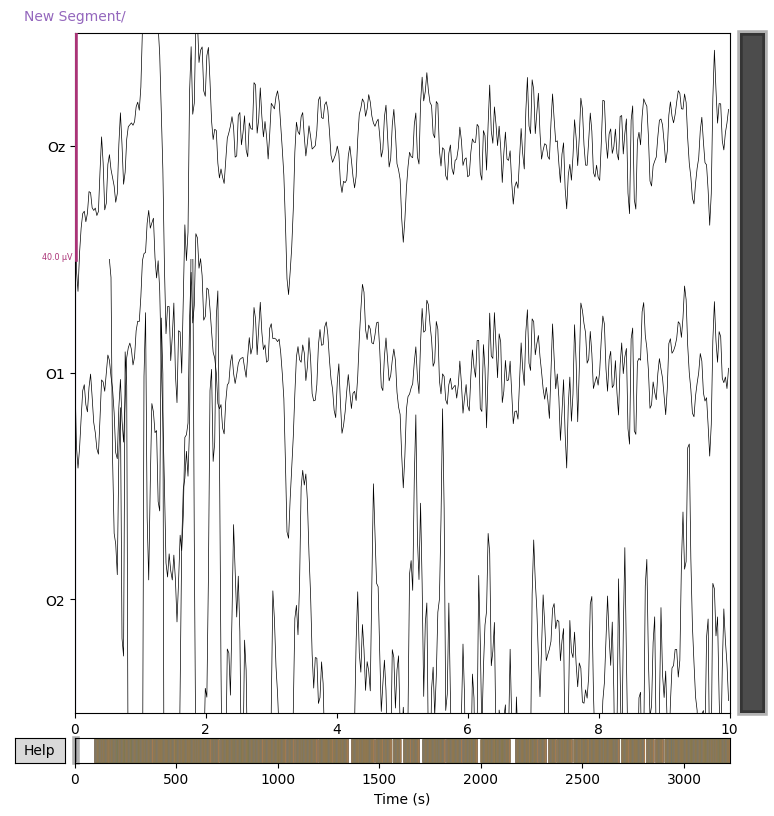

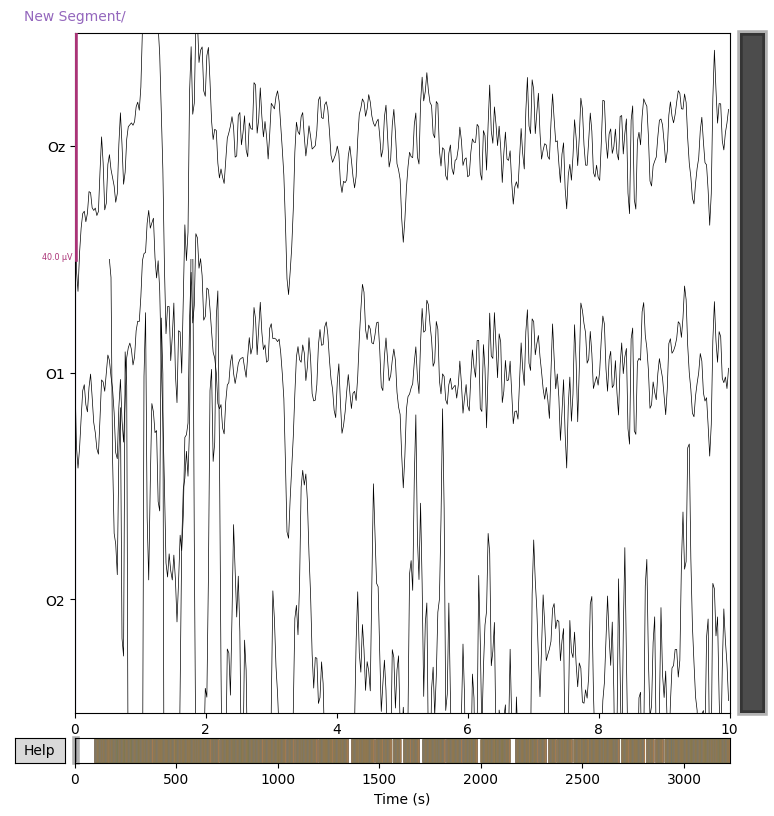

In [19]:
final_raw.pick(['Oz', 'O1', 'O2']).plot()

In [20]:
events, event_id = mne.events_from_annotations(final_raw)

Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']


In [21]:
epochs = mne.Epochs(final_raw, events, tmin=-0.1, tmax=1)

Not setting metadata
49381 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


***

In [22]:
epochs

Number of events,49381
Events,10001: 2464810002: 2464810003: 8499999: 1
Time range,-0.100 – 1.000 sec
Baseline,-0.100 – 0.000 sec


In [23]:
epochs['10001'].events

array([[ 24587,      0,  10001],
       [ 24612,      0,  10001],
       [ 24637,      0,  10001],
       ...,
       [805442,      0,  10001],
       [805468,      0,  10001],
       [805492,      0,  10001]])